In [14]:
import os
import glob
import sox
import tqdm
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
from multiprocessing import Pool

%matplotlib inline  

In [2]:
num_parallel = 16
datapath_root = '/home/tracek/Data/gender/raw/'
datapath_male = os.path.join(datapath_root, 'male/')
datapath_female = os.path.join(datapath_root, 'female/')

In [3]:
waves_male_paths = glob.glob(datapath_male + '/**/*.wav', recursive=True)
waves_female_paths = glob.glob(datapath_female + '/**/*.wav', recursive=True)
readme_paths = glob.glob(datapath_root + '/**/README', recursive=True)

In [4]:
assert len(os.listdir(datapath_male)) + len(os.listdir(datapath_female)) == len(readme_paths)

In [5]:
def get_info(path):
    info = sox.file_info.info(path)
    info['path'] = path
    if 'num_samples' not in info:
        print('No samples in ', path)
    return info

In [6]:
pool = Pool(processes=num_parallel)
male_info = pool.map(get_info, waves_male_paths)
female_info = pool.map(get_info, waves_female_paths)

In [7]:
def get_readme_info(path):
    d = {}
    with open(path, 'r') as readme:
        for line in readme:
            gender_match = re.search("Gender: (\W*\w+\W*)", line, re.IGNORECASE)
            age_match = re.search("Age Range: (\W*\w+\W*)", line, re.IGNORECASE)
            lang_match = re.search("Language: (\W*\w+\W*)", line, re.IGNORECASE)

In [8]:
duration_male = np.array([info['duration'] for info in male_info])
duration_female = np.array([info['duration'] for info in female_info])
total_male = int(duration_male.sum())
total_female = int(duration_female.sum())
print('Total duration of male recordings: {} '.format(str(timedelta(seconds=total_male))))
print('Total duration of female recordings: {} '.format(str(timedelta(seconds=total_female))))

Total duration of male recordings: 3 days, 15:03:21 
Total duration of female recordings: 15:32:04 


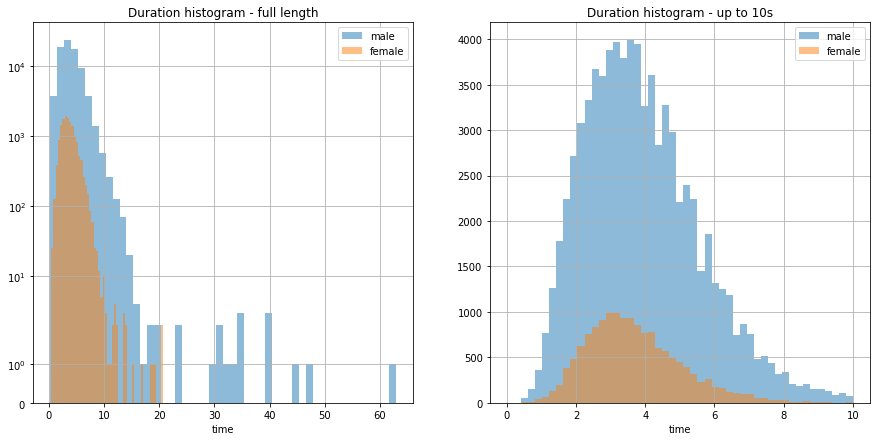

In [9]:
no_bins = 50
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_yscale('symlog')
_ = ax[0].hist(duration_male, bins=no_bins, alpha=0.5, label='male')
_ = ax[0].hist(duration_female, bins=no_bins, alpha=0.5, label='female')
bins = np.linspace(0, 10, no_bins)
_ = ax[1].hist(duration_male, bins=bins, alpha=0.5, label='male')
_ = ax[1].hist(duration_female, bins=bins, alpha=0.5, label='female')
ax[0].legend(loc='upper right')
ax[0].set_title('Duration histogram - full length')
ax[0].set_xlabel('time')
ax[0].grid(True)
ax[1].legend(loc='upper right')
ax[1].set_title('Duration histogram - up to 10s')
ax[1].set_xlabel('time')
ax[1].grid(True)

In [10]:
name_duration_tuples_m = [(info['path'], info['duration']) for info in male_info]
name_duration_tuples_m_short = [(info['path'], info['duration']) for info in male_info if info['duration'] < 0.5]

In [11]:
len(name_duration_tuples_m_short)

12

In [17]:
datapath = '/home/tracek/Data/gender/gender_warbler.csv'
data = pd.read_csv(datapath)
male_df = data[data['label'] == 0]
female_df = data[data['label'] == 1]
print('Male recordings: ', len(male_df))
print('Female recordings: ', len(female_df))
pd.set_option('display.max_columns', len(male_df.columns.values))
pd.set_option('display.max_rows', len(male_df))

male_stats = male_df.describe()
female_stats = female_df.describe()

male_corr = male_df.corr()
female_corr = female_df.corr()

Male recordings:  78820
Female recordings:  15066


In [20]:
male_stats

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,78820.000000,78820.000000,78820.000000,78820.000000,78820.000000,78820.000000,78820.000000,78820.000000,78820.000000,78820.000000,78820.000000,78820.000000,78820.000000,78820.000000,78820.000000,78820.000000,78820.000000,78820.000000,78820.000000,78820.000000,78820.0
mean,0.158190,0.069968,0.155800,0.106229,0.217577,0.111348,5.315956,105.732651,0.913650,0.522978,0.113875,0.158190,0.111827,0.024538,0.238085,0.490626,0.046838,2.842126,2.795288,0.193379,0.0
std,0.029525,0.011912,0.040531,0.040964,0.030279,0.031203,7.640572,265.642245,0.056788,0.150907,0.082187,0.029525,0.021039,0.016960,0.040491,0.423132,0.080493,2.165304,2.149576,0.108625,0.0
min,0.000048,0.000924,0.000000,0.000000,0.000114,0.000114,0.096627,1.362474,0.081732,0.000029,0.000000,0.000048,0.016000,0.015640,0.016000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.142832,0.062430,0.129322,0.092997,0.205044,0.099816,1.817707,6.767020,0.899896,0.442717,0.049931,0.142832,0.098321,0.016194,0.219178,0.180060,0.000000,0.617188,0.585938,0.122613,0.0
50%,0.159605,0.070046,0.152600,0.111946,0.222386,0.112615,2.460985,10.636244,0.922687,0.542471,0.116667,0.159605,0.111734,0.017817,0.253968,0.397569,0.000000,3.070312,3.015625,0.183710,0.0
75%,0.177101,0.077571,0.183902,0.128866,0.237317,0.123661,3.532095,20.589989,0.940810,0.629068,0.166339,0.177101,0.123941,0.024206,0.271186,0.700120,0.085938,4.726562,4.664062,0.258026,0.0
max,0.260308,0.113707,0.270406,0.259467,0.276782,0.258316,51.242799,2774.534469,0.988251,0.907603,0.280000,0.260308,0.249851,0.197531,0.275862,4.855699,2.609375,6.992188,6.992188,1.000000,0.0


In [21]:
female_stats

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,15066.000000,15066.000000,15066.000000,15066.000000,15066.000000,15066.000000,15066.000000,15066.000000,15066.000000,15066.000000,15066.000000,15066.000000,15066.000000,15066.000000,15066.000000,15066.000000,15066.000000,15066.000000,15066.000000,15066.000000,15066.0
mean,0.185398,0.051220,0.190744,0.158069,0.219492,0.061423,3.109131,34.942888,0.883406,0.360126,0.176823,0.185398,0.166105,0.030376,0.256262,0.667128,0.100262,3.885722,3.785460,0.200783,1.0
std,0.027135,0.016517,0.031762,0.044361,0.024374,0.039292,4.204126,138.466819,0.049327,0.144613,0.064844,0.027135,0.022139,0.025143,0.021417,0.410212,0.080838,2.275746,2.250809,0.091063,0.0
min,0.000050,0.001123,0.000000,0.000000,0.000121,0.000121,0.058957,1.706946,0.082314,0.000043,0.000000,0.000050,0.041972,0.015640,0.086957,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.177202,0.038919,0.181398,0.157535,0.204035,0.036971,1.711029,5.797064,0.861708,0.257301,0.170521,0.177202,0.156878,0.016789,0.246154,0.338033,0.000000,1.048828,1.015625,0.135274,1.0
50%,0.188914,0.047223,0.194186,0.170499,0.220898,0.050785,2.219656,8.370690,0.888449,0.320151,0.188432,0.188914,0.169095,0.020000,0.262295,0.618518,0.148438,4.835938,4.695312,0.191833,1.0
75%,0.202092,0.059854,0.208257,0.181184,0.236503,0.068883,2.912152,12.897301,0.911048,0.447784,0.211336,0.202092,0.179428,0.031311,0.271186,0.924594,0.164062,5.703125,5.585938,0.256827,1.0
max,0.252869,0.123865,0.270012,0.253907,0.276212,0.258962,46.825122,2308.549017,0.979994,0.855575,0.280000,0.252869,0.257717,0.225352,0.275862,2.927557,1.210938,6.992188,6.992188,1.000000,1.0


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.531370,0.918285,0.908345,0.830313,-0.386770,-0.457958,-0.417237,0.159927,-0.499641,0.655460,1.000000,0.309700,0.120628,-0.113266,0.414225,0.449952,0.350724,0.336441,0.281725,NaN
sd,-0.531370,1.000000,-0.441099,-0.682203,-0.086575,0.811592,0.410973,0.388134,0.243810,0.642498,-0.522495,-0.531370,-0.127773,-0.057107,0.111296,-0.284795,-0.365445,-0.286867,-0.275282,-0.177614,NaN
median,0.918285,-0.441099,1.000000,0.772453,0.711091,-0.324061,-0.342813,-0.301344,0.147395,-0.407684,0.601589,0.918285,0.225871,0.042936,-0.055700,0.394752,0.423723,0.304268,0.290627,0.219111,NaN
Q25,0.908345,-0.682203,0.772453,1.000000,0.653534,-0.678638,-0.499486,-0.469299,0.075059,-0.512691,0.635642,0.908345,0.337124,0.150121,-0.125235,0.371944,0.423727,0.328561,0.315098,0.296324,NaN
Q75,0.830313,-0.086575,0.711091,0.653534,1.000000,0.112408,-0.337403,-0.303856,0.265974,-0.244582,0.456325,0.830313,0.260794,0.154114,-0.114132,0.292881,0.287644,0.246390,0.237422,0.248244,NaN
IQR,-0.386770,0.811592,-0.324061,-0.678638,0.112408,1.000000,0.328323,0.321247,0.159556,0.435730,-0.391672,-0.386770,-0.189511,-0.047532,0.053659,-0.204088,-0.277151,-0.192247,-0.183275,-0.148128,NaN
skew,-0.457958,0.410973,-0.342813,-0.499486,-0.337403,0.328323,1.000000,0.978248,-0.423898,0.008372,-0.526812,-0.457958,-0.272721,-0.158513,0.146785,-0.397926,-0.208972,-0.438794,-0.434180,-0.484166,NaN
kurt,-0.417237,0.388134,-0.301344,-0.469299,-0.303856,0.321247,0.978248,1.000000,-0.397813,0.008904,-0.476433,-0.417237,-0.251485,-0.157671,0.150416,-0.367938,-0.194626,-0.403165,-0.398827,-0.471864,NaN
sp.ent,0.159927,0.243810,0.147395,0.075059,0.265974,0.159556,-0.423898,-0.397813,1.000000,0.590999,0.050762,0.159927,0.060196,-0.065375,0.068242,0.121628,-0.091384,0.177869,0.182592,0.186912,NaN
sfm,-0.499641,0.642498,-0.407684,-0.512691,-0.244582,0.435730,0.008372,0.008904,0.590999,1.000000,-0.341765,-0.499641,-0.183386,-0.100184,0.096793,-0.132090,-0.327100,-0.105780,-0.094306,0.000530,NaN


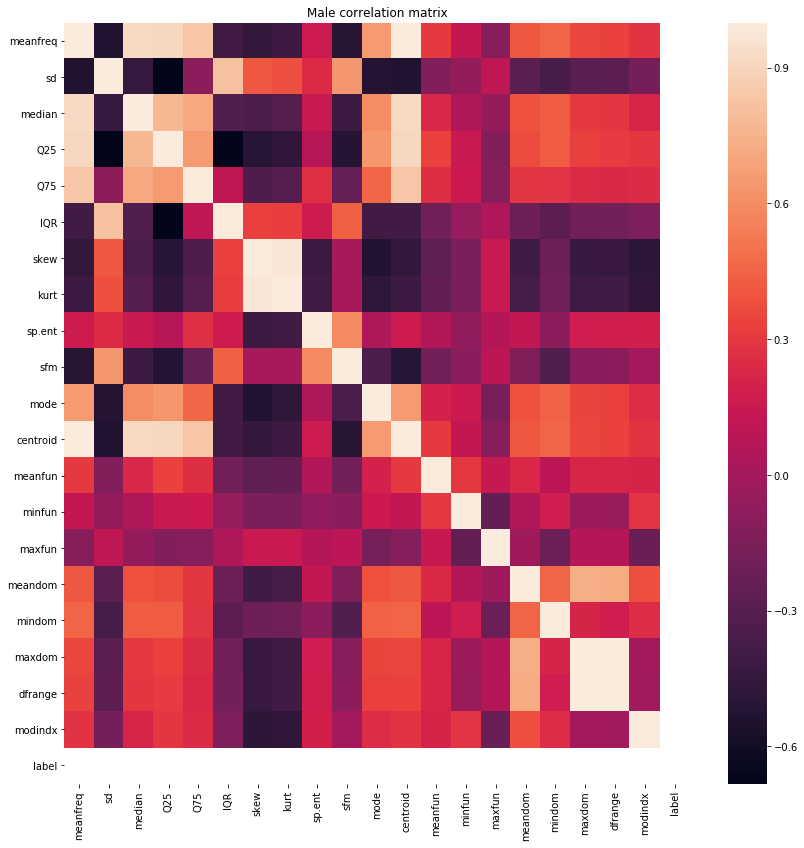

In [18]:
plt.figure(figsize=(14, 14))
plt.title('Male correlation matrix')

sns.heatmap(male_corr, 
            xticklabels=male_corr.columns.values,
            yticklabels=male_corr.columns.values)

male_corr

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.591699,0.918497,0.902134,0.756762,-0.549060,-0.432546,-0.393026,-0.031598,-0.603696,0.692733,1.000000,0.377440,0.022280,0.139019,0.292911,0.449077,0.282852,0.269858,0.102016,NaN
sd,-0.591699,1.000000,-0.360005,-0.741397,0.010176,0.843342,0.413481,0.414254,0.444014,0.791996,-0.508388,-0.591699,-0.226911,-0.114754,0.241278,-0.292050,-0.569494,-0.390213,-0.374083,-0.050739,NaN
median,0.918497,-0.360005,1.000000,0.769501,0.779386,-0.385284,-0.302692,-0.265863,0.023799,-0.438997,0.628579,0.918497,0.357200,0.012623,0.176223,0.220147,0.304623,0.184843,0.175950,0.080306,NaN
Q25,0.902134,-0.741397,0.769501,1.000000,0.470786,-0.836948,-0.507232,-0.490065,-0.163741,-0.626415,0.696789,0.902134,0.407962,0.109540,-0.021341,0.305391,0.453366,0.307263,0.294385,0.131133,NaN
Q75,0.756762,0.010176,0.779386,0.470786,1.000000,0.088815,-0.213375,-0.150340,0.316771,-0.169233,0.437554,0.756762,0.237149,-0.109853,0.396178,0.129861,0.154398,0.061192,0.056324,0.064652,NaN
IQR,-0.549060,0.843342,-0.385284,-0.836948,0.088815,1.000000,0.440297,0.460018,0.381363,0.602237,-0.515241,-0.549060,-0.313474,-0.191814,0.269854,-0.264227,-0.416068,-0.308938,-0.297418,-0.107942,NaN
skew,-0.432546,0.413481,-0.302692,-0.507232,-0.213375,0.440297,1.000000,0.973781,-0.389195,0.055770,-0.546284,-0.432546,-0.217733,-0.072983,0.035086,-0.316585,-0.246191,-0.300883,-0.295374,-0.341491,NaN
kurt,-0.393026,0.414254,-0.265863,-0.490065,-0.150340,0.460018,0.973781,1.000000,-0.337551,0.071647,-0.499239,-0.393026,-0.218243,-0.091520,0.085665,-0.285158,-0.228461,-0.286103,-0.281068,-0.319344,NaN
sp.ent,-0.031598,0.444014,0.023799,-0.163741,0.316771,0.381363,-0.389195,-0.337551,1.000000,0.669291,-0.003498,-0.031598,-0.127057,-0.161566,0.279201,0.056906,-0.229515,-0.029763,-0.021849,0.201129,NaN
sfm,-0.603696,0.791996,-0.438997,-0.626415,-0.169233,0.602237,0.055770,0.071647,0.669291,1.000000,-0.357639,-0.603696,-0.288747,-0.088524,0.121086,-0.129590,-0.493119,-0.245365,-0.230373,0.121188,NaN


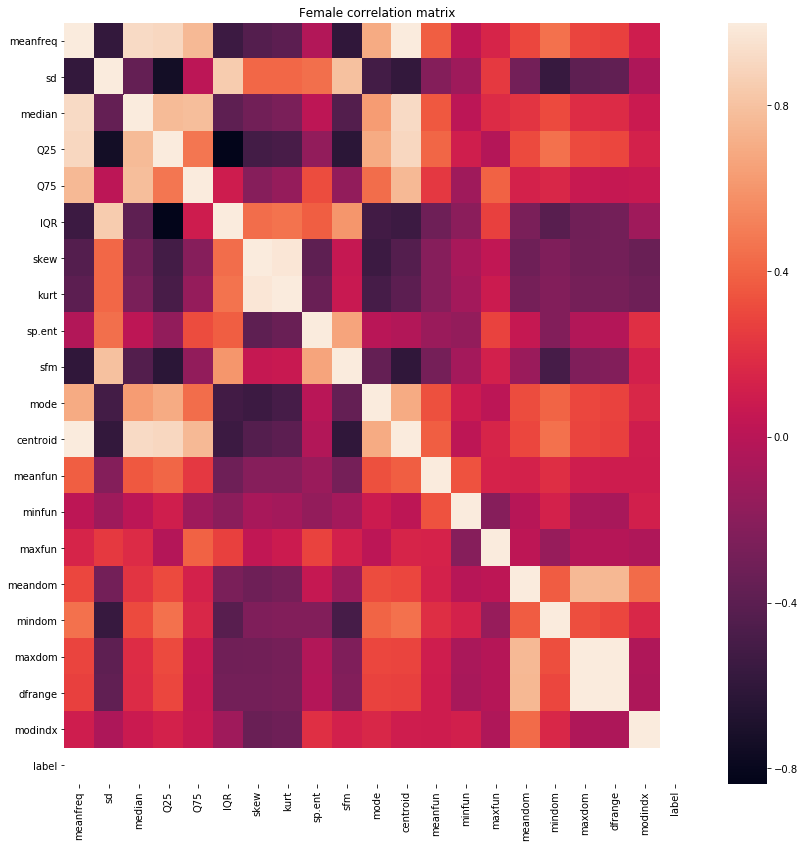

In [19]:
plt.figure(figsize=(14, 14))
plt.title('Female correlation matrix')

sns.heatmap(female_corr, 
            xticklabels=female_corr.columns.values,
            yticklabels=female_corr.columns.values)

female_corr